In [52]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import prepare


import scipy.stats as stats



In [2]:
white_df = pd.read_csv('winequality-white.csv')

In [3]:
white_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
red_df = pd.read_csv('winequality-red.csv')

In [5]:
red_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
white_df['color'] = 'white'

In [7]:
white_df.shape

(4898, 13)

In [8]:
red_df['color'] = 'red'

In [9]:
red_df.shape

(1599, 13)

In [10]:
wine_df = white_df.append(red_df)

In [11]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [12]:
wine_df.shape

(6497, 13)

In [13]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [14]:
wine_df.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [15]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [16]:
wine_df =wine_df.reset_index()

In [17]:
wine_df.shape

(6497, 14)

In [18]:
wine_df.drop(columns = 'index', inplace = True)

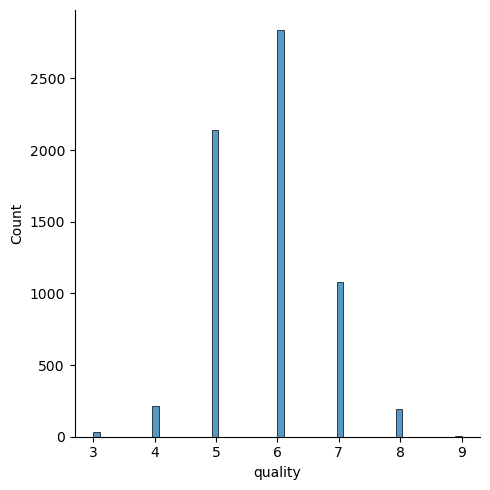

In [19]:
sns.displot(data=wine_df, x="quality")
plt.show()

In [20]:
wine_df, fences = prepare.remove_outliers(wine_df)

quality column ignored
color column ignored


In [21]:
wine_df.shape

(5024, 13)

In [22]:
train, val, test = prepare.tts(wine_df, 'quality')

In [23]:
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1574            8.5              0.17         0.49             8.8      0.048   
1582            8.4              0.24         0.49             7.4      0.039   
4505            6.4              0.28         0.23             6.0      0.051   
4789            5.5              0.62         0.33             1.7      0.037   
4097            6.4              0.14         0.28             7.9      0.057   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1574                 23.0                 108.0  0.99470  2.88       0.34   
1582                 46.0                 108.0  0.99340  3.03       0.33   
4505                 50.0                 162.0  0.99400  3.15       0.52   
4789                 24.0                 118.0  0.98758  3.15       0.39   
4097                 21.0                  82.0  0.99425  3.26       0.36   

      alcohol  quality  color  
1574    10.50        4  white  
1582    11.90        7  white  
4505    10.20        5  white  
4789    13.55        6  white  
4097    10.00        6  white

In [24]:
train.shape

(2813, 13)

In [25]:
train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1574            8.5              0.17         0.49            8.80      0.048   
1582            8.4              0.24         0.49            7.40      0.039   
4505            6.4              0.28         0.23            6.00      0.051   
4789            5.5              0.62         0.33            1.70      0.037   
4097            6.4              0.14         0.28            7.90      0.057   
...             ...               ...          ...             ...        ...   
768             6.7              0.11         0.34            8.80      0.043   
2205            7.7              0.39         0.34           10.00      0.056   
4598            6.5              0.36         0.31           13.55      0.053   
3741            7.0              0.15         0.28           14.70      0.051   
3369            7.0              0.22         0.28           10.60      0.039   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1574                 23.0                 108.0  0.99470  2.88       0.34   
1582                 46.0                 108.0  0.99340  3.03       0.33   
4505                 50.0                 162.0  0.99400  3.15       0.52   
4789                 24.0                 118.0  0.98758  3.15       0.39   
4097                 21.0                  82.0  0.99425  3.26       0.36   
...                   ...                   ...      ...   ...        ...   
768                  41.0                 113.0  0.99620  3.42       0.40   
2205                 35.0                 178.0  0.99740  3.26       0.60   
4598                 20.0                 113.0  0.99544  3.20       0.56   
3741                 29.0                 149.0  0.99792  2.96       0.39   
3369                 32.0                 117.0  0.99355  3.05       0.55   

      alcohol  quality  color  
1574    10.50        4  white  
1582    11.90        7  white  
4505    10.20        5  white  
4789    13.55        6  white  
4097    10.00        6  white  
...       ...      ...    ...  
768      9.30        7  white  
2205    10.20        5  white  
4598    11.00        6  white  
3741     9.00        7  white  
3369    11.50        7  white  

[2813 rows x 13 columns]

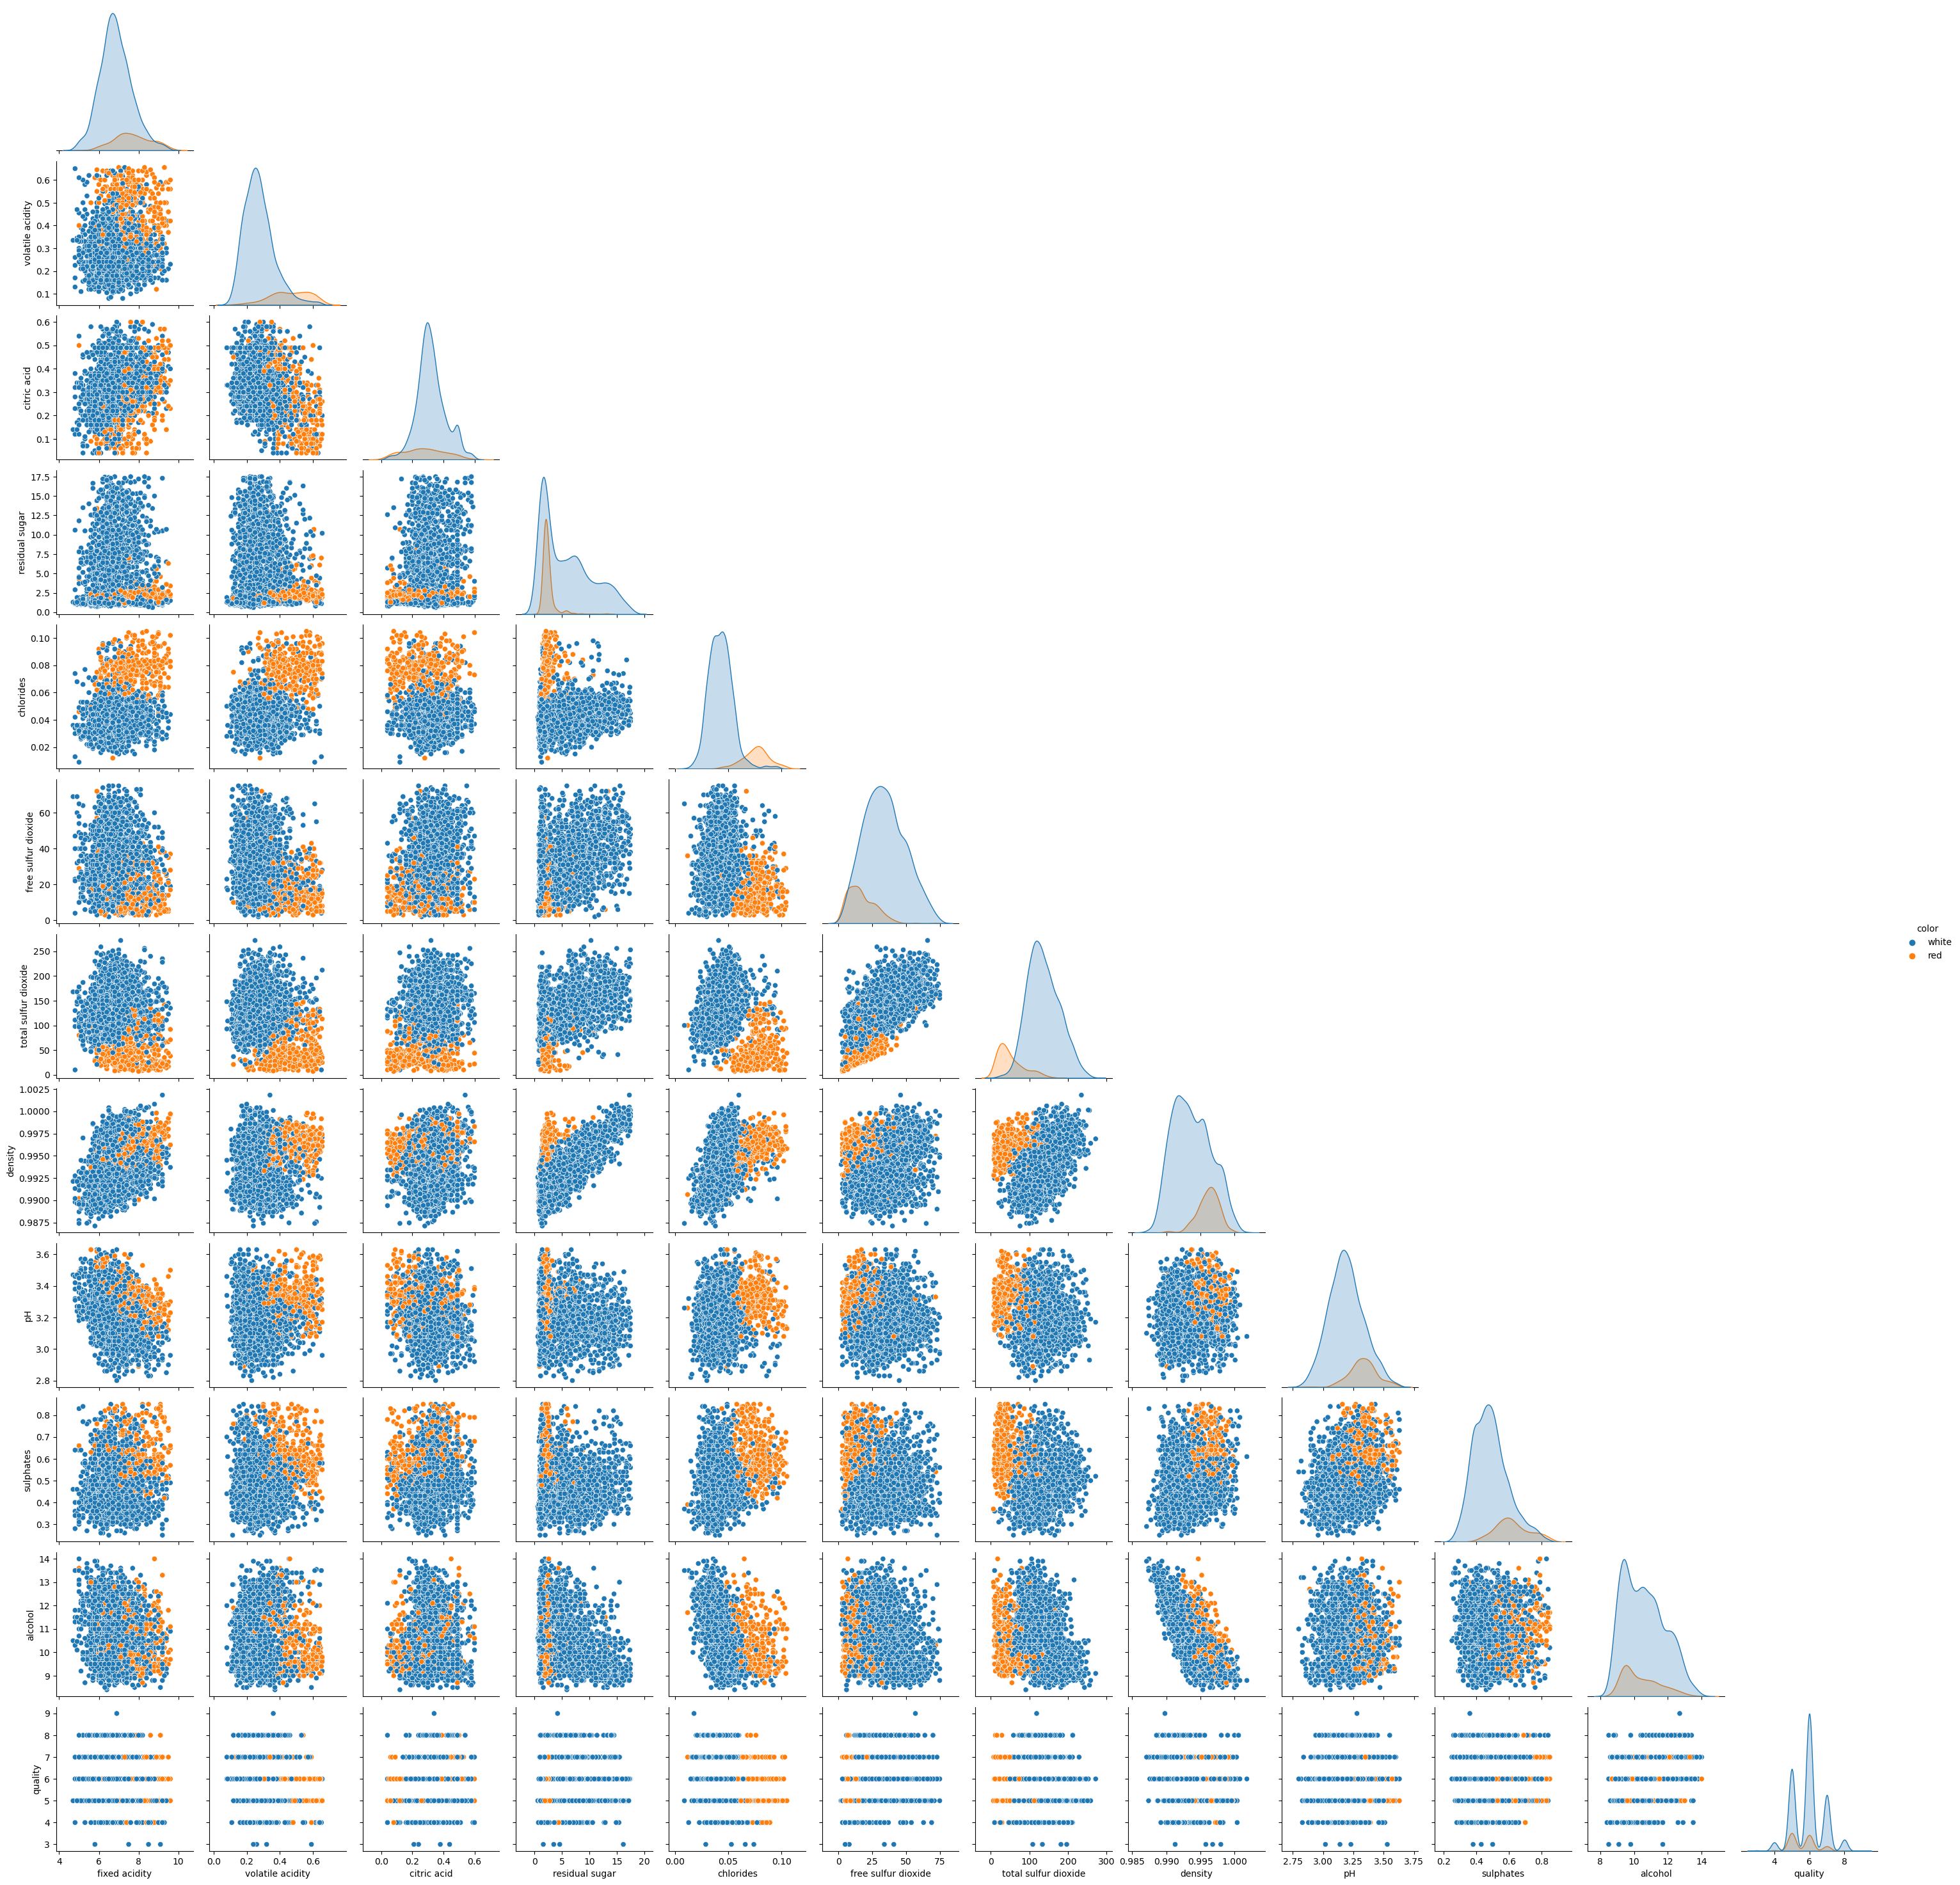

In [26]:
sns.pairplot(train, hue = 'color',corner = True)
plt.show()

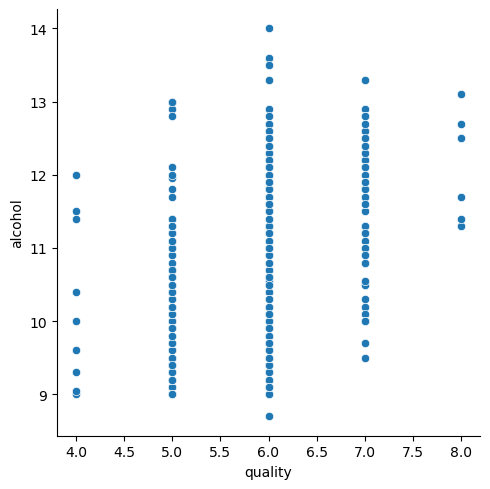

In [27]:
sns.relplot(data=wine_df[wine_df['color'] == 'red'], x="quality", y="alcohol")
plt.show()

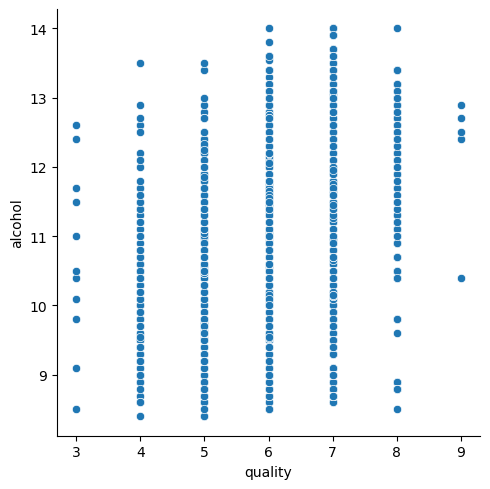

In [28]:
sns.relplot(data=wine_df[wine_df['color'] == 'white'], x="quality", y="alcohol")
plt.show()

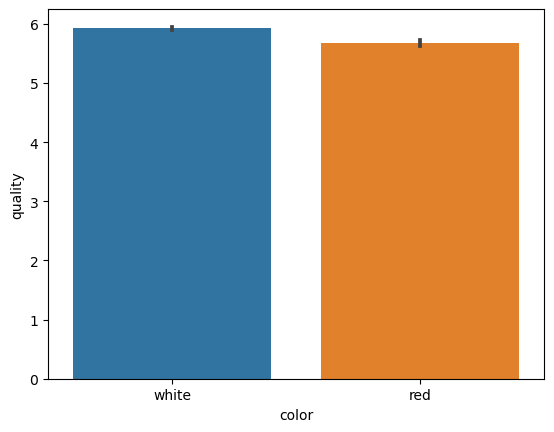

In [29]:
sns.barplot(data=wine_df, x="color", y="quality")
plt.show()

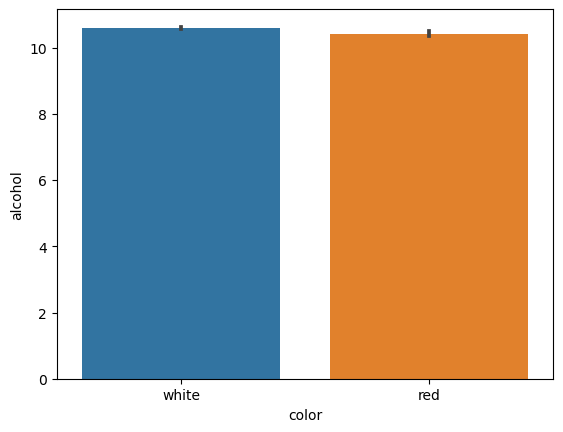

In [30]:
sns.barplot(data=wine_df, x="color", y="alcohol")
plt.show()

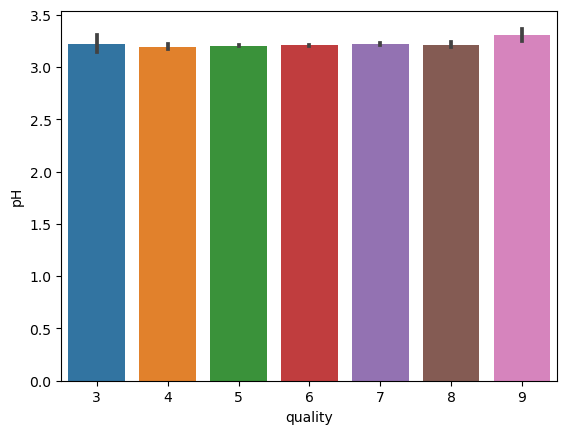

In [31]:
sns.barplot(data=wine_df, x="quality", y="pH")
plt.show()

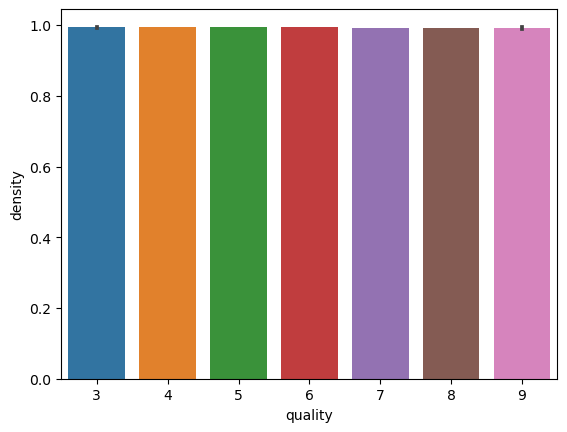

In [32]:
sns.barplot(data=wine_df, x="quality", y="density")
plt.show()

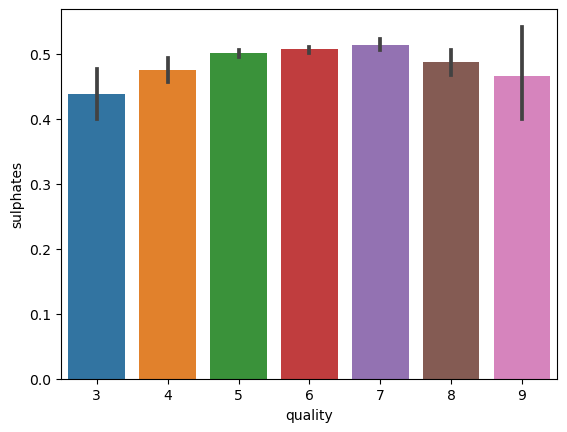

In [33]:
sns.barplot(data=wine_df, x="quality", y="sulphates")
plt.show()

In [34]:
train_s = train.copy()

In [35]:
train_s = prepare.scale_wine(train_s)
train_s.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1574       0.775510          0.156522     0.803571        0.485207   0.406250   
1582       0.755102          0.278261     0.803571        0.402367   0.312500   
4505       0.346939          0.347826     0.339286        0.319527   0.437500   
4789       0.163265          0.939130     0.517857        0.065089   0.291667   
4097       0.346939          0.104348     0.428571        0.431953   0.500000   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1574             0.287671              0.381132  0.515976  0.096386   
1582             0.602740              0.381132  0.427600  0.277108   
4505             0.657534              0.584906  0.468389  0.421687   
4789             0.301370              0.418868  0.031951  0.421687   
4097             0.260274              0.283019  0.485384  0.554217   

      sulphates   alcohol  quality  color  
1574   0.150000  0.375000        4  white  
1582   0.133333  0.625000        7  white  
4505   0.450000  0.321429        5  white  
4789   0.233333  0.919643        6  white  
4097   0.183333  0.285714        6  white

Is there an independence between citric acid and quality?

    quality 3, 4 and 8, 9 split
    
    ttest between the mean of the two
    
Is there an independence between pH and Quality?

    quality 3, 4 and 8, 9 split
    
     ttest between the mean of the two
     

In [41]:
q34 = train[train['quality'] < 6]
q89 = train[train['quality'] > 6]

In [42]:
q34.shape

(930, 13)

In [43]:
q89.shape

(601, 13)

In [44]:
train.shape

(2813, 13)

In [40]:
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1574            8.5              0.17         0.49             8.8      0.048   
1582            8.4              0.24         0.49             7.4      0.039   
4505            6.4              0.28         0.23             6.0      0.051   
4789            5.5              0.62         0.33             1.7      0.037   
4097            6.4              0.14         0.28             7.9      0.057   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1574                 23.0                 108.0  0.99470  2.88       0.34   
1582                 46.0                 108.0  0.99340  3.03       0.33   
4505                 50.0                 162.0  0.99400  3.15       0.52   
4789                 24.0                 118.0  0.98758  3.15       0.39   
4097                 21.0                  82.0  0.99425  3.26       0.36   

      alcohol  quality  color  
1574    10.50        4  white  
1582    11.90        7  white  
4505    10.20        5  white  
4789    13.55        6  white  
4097    10.00        6  white

In [46]:
q34_m = q34['citric acid'].mean()

In [47]:
q89_m = q89['citric acid'].mean()

In [48]:
q34['citric acid'].var()

0.014471687790085293

In [49]:
q89['citric acid'].var()

0.005637502495840281

In [53]:
t, p = stats.ttest_ind(q34['citric acid'], q89['citric acid'], equal_var=False)
                                               
t, p/2

(-4.700767230222191, 1.41263218936966e-06)

In [54]:
q34['pH'].var(), q89['pH'].var()

(0.020878825537923758, 0.023331732667775884)

In [55]:
t, p = stats.ttest_ind(q34['pH'], q89['pH'])
                                               
t, p/2

(-1.9691594838195439, 0.024557554378423878)

In [56]:
alpha = .05

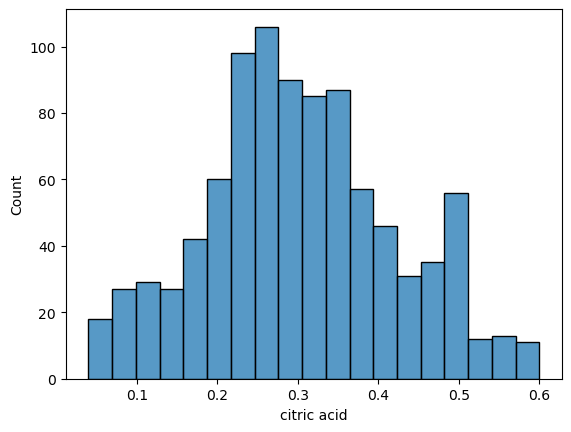

In [67]:
sns.histplot(data=q34, x="citric acid")
plt.show()

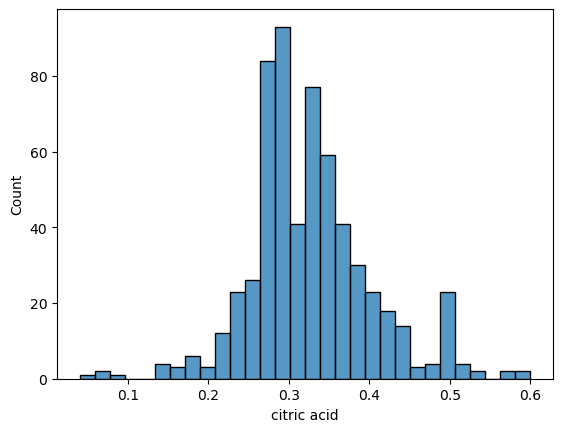

In [65]:
sns.histplot(data=q89, x="citric acid")
plt.show()

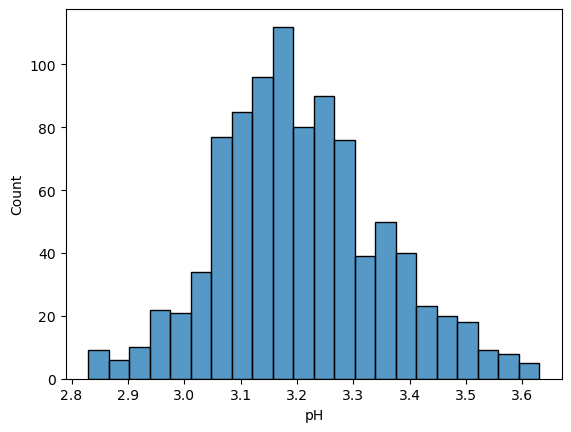

In [66]:
sns.histplot(data=q34, x="pH")
plt.show()

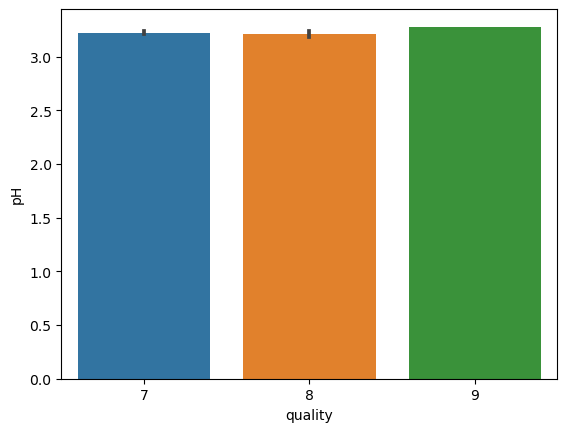

In [60]:
sns.barplot(data=q89, x="quality", y="pH")
plt.show()

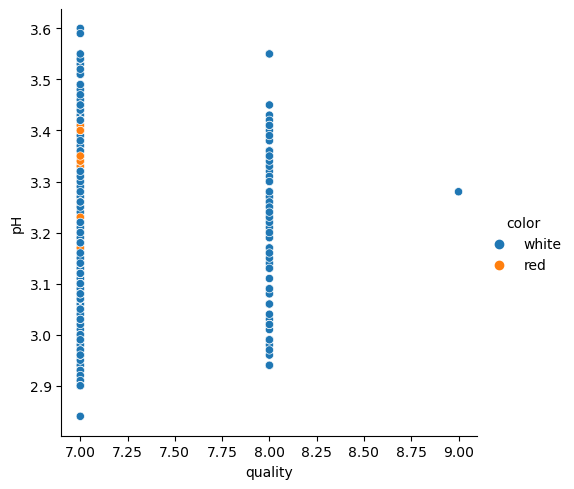

In [62]:
sns.relplot(data=q89, x="quality", y="pH", hue = 'color')
plt.show()

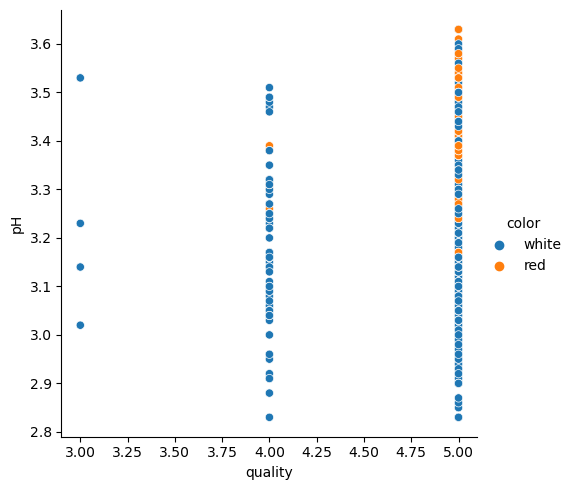

In [63]:
sns.relplot(data=q34, x="quality", y="pH", hue = 'color')
plt.show()

In [88]:
def q1_plots():
    plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.histplot(x='citric acid', data=q34)
    plt.title('Low Quality Wine (3-4)')
    plt.xlabel('Citric Acid')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.subplot(222)
    sns.histplot(x='citric acid', data=q89)
    plt.title('High Quality Wine (8-9)')
    plt.xlabel('Citric Acid')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.figure(figsize = (25,10))
    plt.subplot(223)
    plt.title('High and Low Quality Wines')
    sns.histplot(x='pH', data=q34, alpha=.25, color='green', label= 'Low Quality')
    sns.histplot(x='pH', data=q89, alpha=.50, label='High Quality')
    plt.xlabel('pH')
    plt.axvline(x=(q34['pH'].mean()), color='red', label='Low Quality Mean')
    plt.axvline(x=(q89['pH'].mean()), color='yellow', label='High Quality Mean')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()
    





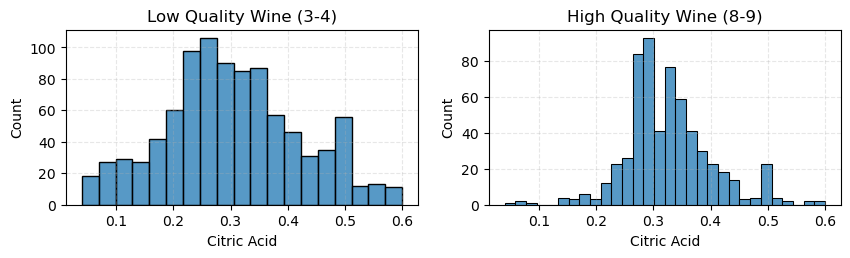

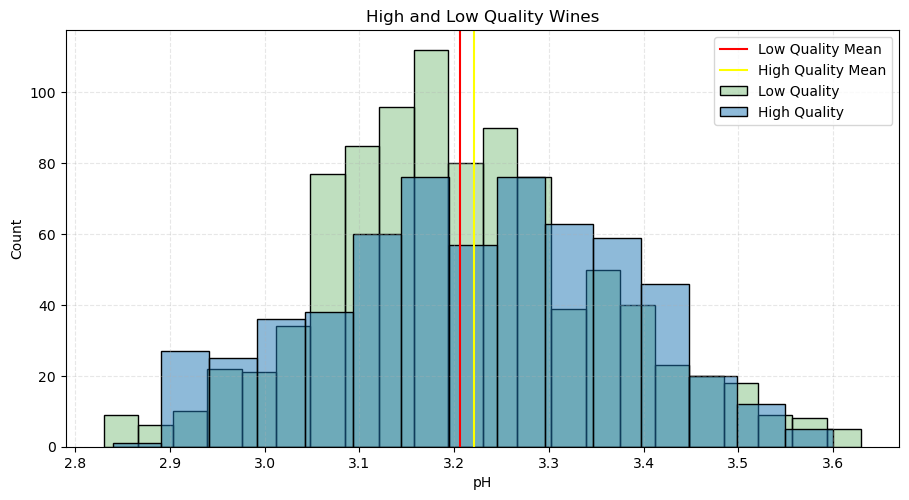

In [89]:
q1_plots()

In [120]:
seed = 8675309
kmeans_scale = KMeans(n_clusters = 3, random_state = seed)

kmeans_scale.fit(train_s[['fixed acidity', 'volatile acidity']])


KMeans(n_clusters=3, random_state=8675309)

In [121]:
train_s['scaled_clusters'] = kmeans_scale.predict(train_s[['fixed acidity', 'volatile acidity']])

train_s.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1574       0.775510          0.156522     0.803571        0.485207   0.406250   
1582       0.755102          0.278261     0.803571        0.402367   0.312500   
4505       0.346939          0.347826     0.339286        0.319527   0.437500   
4789       0.163265          0.939130     0.517857        0.065089   0.291667   
4097       0.346939          0.104348     0.428571        0.431953   0.500000   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1574             0.287671              0.381132  0.515976  0.096386   
1582             0.602740              0.381132  0.427600  0.277108   
4505             0.657534              0.584906  0.468389  0.421687   
4789             0.301370              0.418868  0.031951  0.421687   
4097             0.260274              0.283019  0.485384  0.554217   

      sulphates   alcohol  quality  color  scaled_clusters  
1574   0.150000  0.375000        4  white                1  
1582   0.133333  0.625000        7  white                1  
4505   0.450000  0.321429        5  white                0  
4789   0.233333  0.919643        6  white                2  
4097   0.183333  0.285714        6  white                0

In [122]:
kmeans_scale.cluster_centers_

array([[0.33849801, 0.30353492],
       [0.62620838, 0.30396135],
       [0.52810795, 0.70753305]])

In [123]:
centroids = pd.DataFrame(kmeans_scale.cluster_centers_, columns=['fixed acidity', 
                                                                          'volatile acidity'])
centroids

fixed acidity  volatile acidity
0       0.338498          0.303535
1       0.626208          0.303961
2       0.528108          0.707533

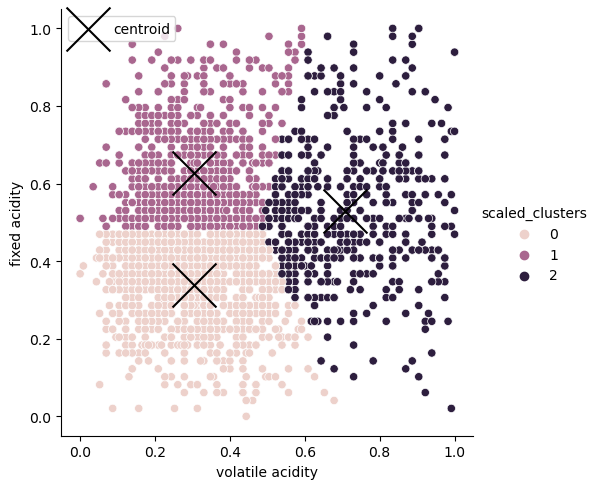

In [124]:
sns.relplot(data = train_s, x = 'volatile acidity', y = 'fixed acidity', hue = 'scaled_clusters')
centroids.plot.scatter(y='fixed acidity', x='volatile acidity', 
                       c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')
plt.show()

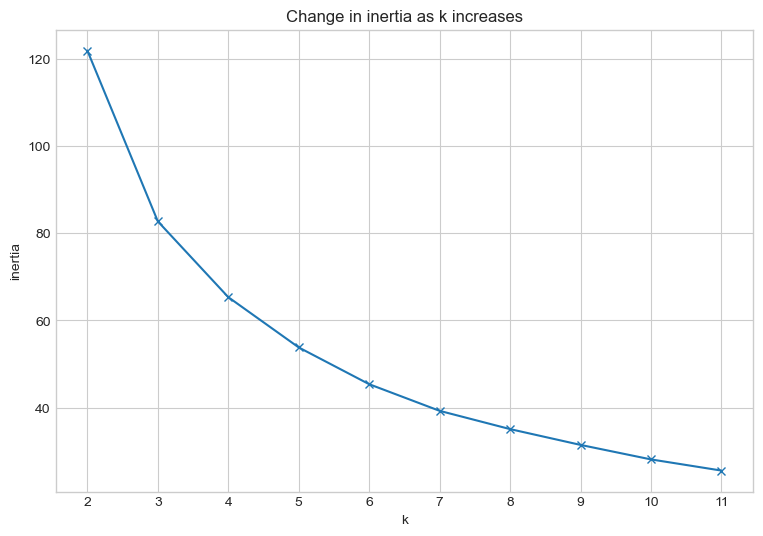

In [125]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_s[['fixed acidity', 
                                         'volatile acidity']]).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

    plt.show()